In [16]:
from pathlib import Path
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define autocorrelation function

In [17]:
def auto_corr(series, length):
    series = series - np.mean(series)
    correlation = np.correlate(series, series, mode="full")
    
    middle_idx = int((len(correlation)-1)/2)
    correlation = correlation[middle_idx:]
    correlation = correlation/np.dot(series,series)
    
    l = len(correlation)
    
    if l > length:
        correlation = correlation[:length]
    if l < length:
        correlation = np.concatenate([correlation, np.zeros((length-l))])
    
    return correlation

# Read trace data, compute autocorrelation

In [18]:
root_dir = Path(os.path.abspath('')).parents[1]
experiment_dir = os.path.join(root_dir, "axon_geometry")

brains = ["brain1", "brain2"]
measures = ["curvature", "torsion"]
max_id = 300
corr_length=25

d = []

for brain in brains:
    data_dir = os.path.join(experiment_dir, "data", brain)
    segments_swc_dir = os.path.join(data_dir, "segments_swc")
    trace_data_dir = os.path.join(data_dir, "trace_data", "1")
    print(f"Directory where swcs reside: {segments_swc_dir}")
    
    for i in tqdm(np.arange(0, max_id)):
        i = int(i)
        trace_data_path = os.path.join(trace_data_dir, f"{i}.npy")
        if os.path.exists(trace_data_path) is True:
            trace_data = np.load(trace_data_path, allow_pickle=True)
            
            for node in trace_data:
                for measure in measures:
                    _measure = node[measure]
                    
                    if np.var(_measure) > 0:
                        autocorr = auto_corr(_measure, corr_length)
                        for distance, value in zip(np.arange(corr_length), autocorr):
                            d.append({"brain": brain, "measure": measure, "distance": distance, "value": value})
df = pd.DataFrame(d)

100%|██████████| 300/300 [00:07<00:00, 40.95it/s]


# Plot autocorrelation as a function of lag

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

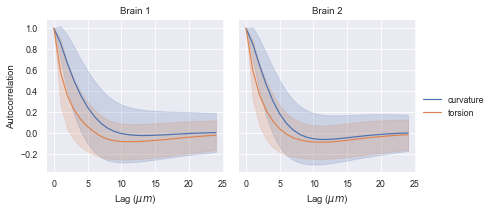

In [19]:
sns.set_theme()
sns.set_context("paper")

g = sns.FacetGrid(df, col="brain", hue="measure")
g.map(sns.lineplot, "distance", "value", err_style="band", ci="sd")
g.set_axis_labels(r"Lag ($\mu m$)", "Autocorrelation")
g.add_legend(title="")
axes = g.axes.flatten()
axes[0].set_title("Brain 1")
axes[1].set_title("Brain 2")
g.savefig(os.path.join(experiment_dir, "figures",  f"autocorrelation.eps"))
g.savefig(os.path.join(experiment_dir, "figures", f"autocorrelation.jpg"))

In [20]:
print(axes[0].errorbar)

<bound method Axes.errorbar of <AxesSubplot:title={'center':'Brain 1'}, xlabel='Lag ($\\mu m$)', ylabel='Autocorrelation'>>


In [47]:
from scipy import stats

for measurement in ["curvature", "torsion"]:
    for lag in range(1,25):
        data = df[(df["distance"] == lag) & (df["measure"] == measurement) & (df["brain"] == "brain1")]["value"].to_numpy()
        _, p = stats.ttest_1samp(data,0.3,alternative="greater")
        if p < 0.05:
            print(f"Signicant t-test at lag: {lag} in brain 1 and measurement: {measurement}, p: {p}")
        else:
            break

for measurement in ["curvature", "torsion"]:
    for lag in range(1,25):
        data = df[(df["distance"] == lag) & (df["measure"] == measurement) & (df["brain"] == "brain2")]["value"].to_numpy()
        _, p = stats.ttest_1samp(data,0.3,alternative="greater")
        if p < 0.05:
            print(f"Signicant t-test at lag: {lag} in brain 2 and measurement: {measurement}, p: {p}")
        else:
            break

Signicant t-test at lag: 1 in brain 1 and measurement: curvature, p: 0.0
Signicant t-test at lag: 2 in brain 1 and measurement: curvature, p: 0.0
Signicant t-test at lag: 3 in brain 1 and measurement: curvature, p: 0.0
Signicant t-test at lag: 4 in brain 1 and measurement: curvature, p: 9.485971355239741e-116
Signicant t-test at lag: 1 in brain 1 and measurement: torsion, p: 0.0
Signicant t-test at lag: 2 in brain 1 and measurement: torsion, p: 1.0518199527132954e-101
Signicant t-test at lag: 1 in brain 2 and measurement: curvature, p: 0.0
Signicant t-test at lag: 2 in brain 2 and measurement: curvature, p: 0.0
Signicant t-test at lag: 3 in brain 2 and measurement: curvature, p: 0.0
Signicant t-test at lag: 1 in brain 2 and measurement: torsion, p: 0.0
Signicant t-test at lag: 2 in brain 2 and measurement: torsion, p: 1.0331221355671699e-194
